In [41]:
# https://github.com/NielsRogge/Transformers-Tutorials/blob/master/ViTMAE/ViT_MAE_visualization_demo.ipynb

In [4]:
import random

import numpy as np
import torch
from torch.utils.data import DataLoader
from transformers import ViTMAEConfig, ViTMAEForPreTraining

from src.datasets import CustomDataset, collate_fn_valid_test
from src.plotters import plot_mae
from src.utils import select_device, extract_mae

%reload_ext autoreload
%autoreload 2

device = select_device()

In [2]:
vitmaeconfig = {
    'image_size': 64,
    'patch_size': 4,
    'num_channels': 16,
    #
    'mask_ratio': 0.5,
    'norm_pix_loss': True,
    #
    'hidden_size': 192,
    'intermediate_size': 768,
    'num_hidden_layers': 6,
    'num_attention_heads': 6,
    #
    'hidden_dropout_prob': 0.0,
    'attention_probs_dropout_prob': 0.0,
    #
    'decoder_hidden_size': 192,
    'decoder_intermediate_size': 768,
    'decoder_num_hidden_layers': 6,
    'decoder_num_attention_heads': 6,
}

MODEL_PATH = "model.pth"
checkpoint = torch.load(MODEL_PATH, map_location=device, weights_only=True)

model = ViTMAEForPreTraining(config=ViTMAEConfig(**vitmaeconfig)).to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [3]:
test_data = np.load("/Users/martin/Developer/datasets/alentic/mae/240309/testing_dataset.npy")
test_dataset = CustomDataset(test_data)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=128,
    shuffle=True,
    collate_fn=collate_fn_valid_test
)

In [8]:
random.seed(42)

patched_images = []
for batch in test_dataloader:
    patched_images.append(batch)

patched_images = torch.cat(patched_images)
random.shuffle(patched_images)

print(patched_images.shape)
dataset = CustomDataset(patched_images)

torch.Size([36864, 16, 64, 64])


In [21]:
mae_dict = extract_mae(
    model,
    dataset,
    image_index=10,
    device=device,
    denormalize=True)

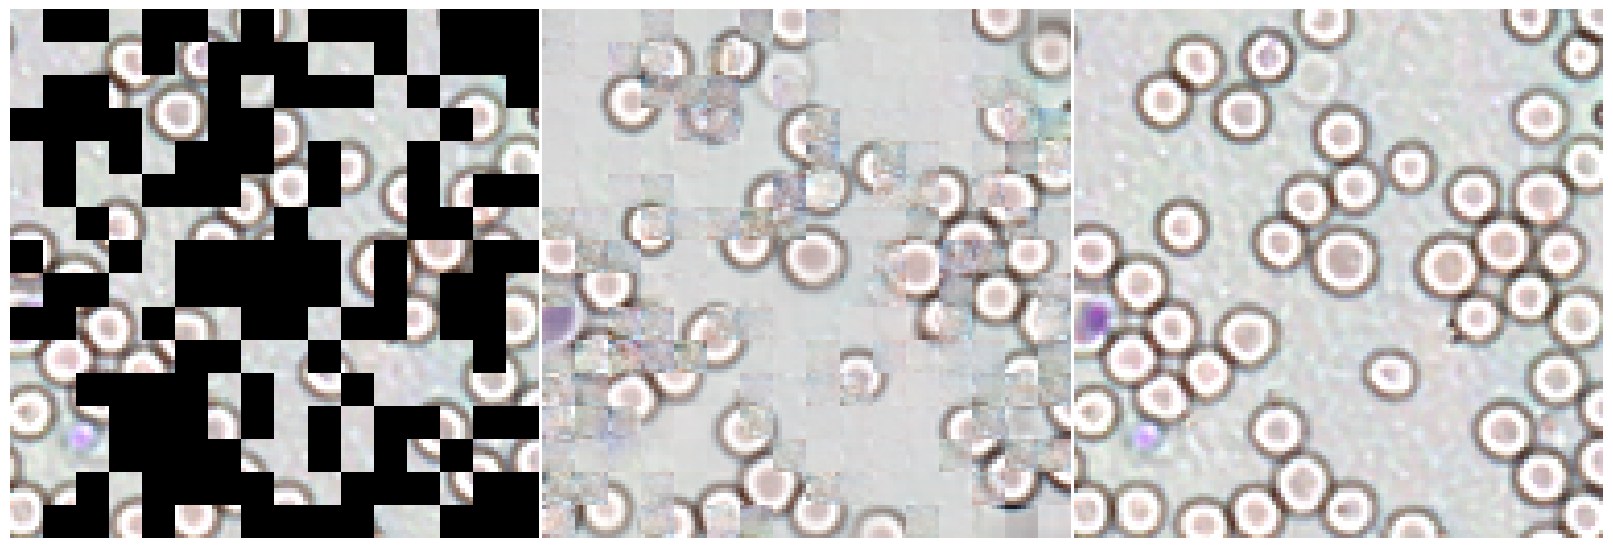

In [23]:
plot_mae(mae_dict, resolution='super', fname='mae-mh-09-super.pdf')

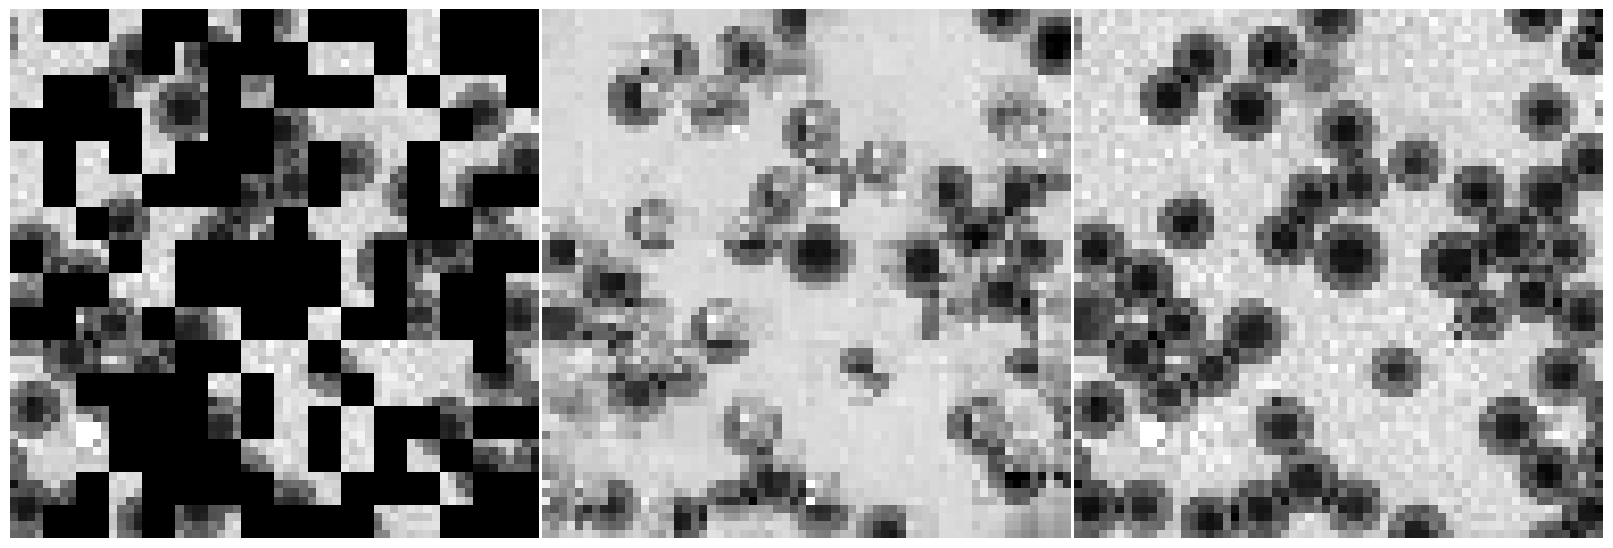

In [24]:
plot_mae(mae_dict, resolution='violet', fname='mae-mh-09-violet.pdf')